In [1]:
from wanpy.wpythtb import *
from pythtb import *
from models import Haldane

import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wanpy.wpythtb'

In [2]:
delta = 1
t = 1
t2 = -0.3

n_super_cell = 5
model = Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

model_str = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}_n_occ={n_occ}'

In [3]:
save_name = f'Wan_frac_{model_str}_WFs'
sv_dir = 'data'
file_name = f"{sv_dir}/{save_name}.npy"

WFs = np.load(file_name, allow_pickle=True)
WFs_dict = WFs.item()
WFs_dict

{np.int64(24): <wanpy.wpythtb.Wannier at 0x10aaaf4c0>,
 np.int64(23): <wanpy.wpythtb.Wannier at 0x10dedea10>,
 np.int64(22): <wanpy.wpythtb.Wannier at 0x10dedf4c0>}

# occupied bands: 25


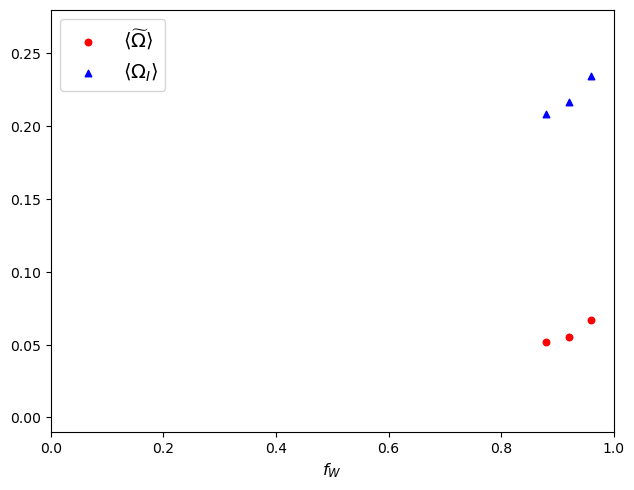

In [4]:
n_WFs = np.array(list(WFs_dict.keys()))
Wf_frac = n_WFs/n_occ # Wannier fraction
omega_til_lst = np.array([wf.omega_til for wf in list(WFs_dict.values())]) # omega tildes
omega_i_lst = np.array([wf.omega_i for wf in list(WFs_dict.values())]) # omega_i s
avg_omega_til = omega_til_lst / n_WFs # normalize spread 
avg_omega_i = omega_i_lst / n_WFs # normalize spread

print(f"# occupied bands: {n_occ}")

plt.scatter(Wf_frac, avg_omega_til, c='r', s=22, marker='o', label=r'$\langle \widetilde{\Omega} \rangle$') # / # Wannier functions
plt.scatter(Wf_frac, avg_omega_i, c='b', s=22, marker='^', label=r'$\langle \Omega_I \rangle$')

# plt.ylabel(r'$\langle \widetilde{\Omega} \rangle$', size=12)
# plt.xlabel(r'$n_{W}\ /\ n_{\rm occ}$', size=12)
plt.xlabel(r'$f_{W}$', size=12)

# plt.title(r"C=-1.0 $\Delta$ = 1 $t_0=0.4$ $t'=0.5$")
plt.ylim(-0.01, .28)
plt.xlim(0, 1.0)
plt.legend(loc='upper left', fontsize=14)

plt.subplots_adjust(top=0.98, left=0.1, bottom=0.1, right=0.98)

# save_name = f'Delta={delta}_t={t}_t_2={t2}_n_occ={n_occ}'
plt.savefig(f'images/Wan_frac_{model_str}.png', dpi=700)

In [8]:
import matplotlib.path as mpath

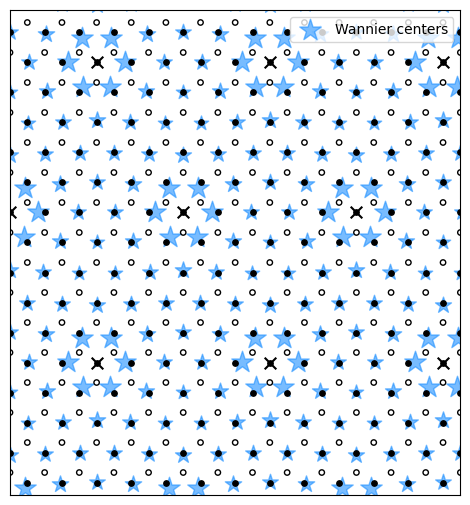

In [9]:
n_wfs = 24
Wf = WFs_dict[n_wfs] 
trial_wfs = Wf.trial_wfs
delta_sites = np.sort(np.array([int(np.where(trial_wfs[i]!=0)[0][0]) for i in range(trial_wfs.shape[0])]))
omit_sites = np.setdiff1d(low_E_sites, delta_sites)

title = (
  "Haldane model \n"
  fr"$C = {chern: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
  )

kwargs_centers = {'marker': '*', 'c': 'dodgerblue', 'alpha': 0.6} 
kwargs_omit = {'s': 70, 'marker': 'x', 'c': 'k', 'zorder': 3} 
kwargs_lat = {'s': 15, 'marker': 'o', 'c': 'k'} 

fig, ax = plt.subplots(figsize=(5,5))

fig, ax = Wf.plot_centers(
    title=title, center_scale=8, omit_sites=omit_sites, section_home_cell=False, 
    color_home_cell=True, translate_centers=True, kwargs_centers=kwargs_centers, 
    kwargs_lat=kwargs_lat, kwargs_omit=kwargs_omit, pmx=8, pmy=8, legend=True, 
    fig=fig, ax=ax)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('')
ax.set_aspect('equal')

save_name = f'Wan_centers_{model_str}_nWfs={n_wfs}'
sv_dir = 'images'
file_name = f"{sv_dir}/{save_name}_centered.png"

plt.subplots_adjust(top=0.98, left=-0.2, bottom=0.01, right=1.2)
ax.set_xlim(-6, 7)
ax.set_ylim(-7, 7)
plt.savefig(file_name, dpi=700, bbox_inches='tight')